<a href="https://colab.research.google.com/github/arpitchittora/arpit-ml-zoomcamp/blob/main/Evaluation_Metrics_for_Classification(MLzoomcamp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

--2021-10-02 13:39:20--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.1’

CreditScoring.csv.1 100%[===================>] 178.21K  --.-KB/s    in 0.02s   

2021-10-02 13:39:20 (7.32 MB/s) - ‘CreditScoring.csv.1’ saved [182489/182489]



**Preparation**

In [52]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()
df.head().T

,0,1,2,3,4
status,1,1,2,1,1
seniority,9,17,10,0,0
home,1,1,2,1,1
time,60,60,36,60,36
age,30,58,46,24,26
marital,2,3,2,1,1
records,1,1,2,1,1
job,3,1,3,1,1
expenses,73,48,90,63,46
income,129,131,200,182,107


Some of the features are encoded as numbers. Use the following code to de-code them:

In [53]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [54]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [55]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [56]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

What are the categorical variables? What are the numerical?

In [57]:
categorical = [
    'home',
    'marital',
    'records',
    'job'
]

numerical = [
    'seniority',
    'time',
    'age',
    'expenses',
    'income',
    'assets',
    'debt',
    'amount',
    'price'
]

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [59]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

del df_train['default']
del df_val['default']
del df_test['default']

In [60]:
len(df_train),len(df_val),len(df_test),len(y_train),

(2672, 891, 891, 2672)

In [61]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,12,private,24,28,married,no,fixed,45,102,0,0,700,1229
1,4,other,60,28,married,no,fixed,60,143,0,0,1150,1630
2,0,owner,60,27,married,no,fixed,35,295,6000,0,1950,2208
3,6,owner,48,28,married,no,fixed,45,114,3500,0,650,1255
4,12,owner,36,42,married,no,freelance,60,0,15000,0,1000,1500


In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
for r in ['seniority','time','income','debt']:
  score = roc_auc_score(y_train,-df_train[r]) < 0.5
  print("label: %s , score: %.3f"  % (r, roc_auc_score(y_train,-df_train[r])))

label: seniority , score: 0.709
label: time , score: 0.439
label: income , score: 0.682
label: debt , score: 0.505


**Training the model**

In [64]:
feature = ['seniority', 'income', 'assets', 'records', 'job', 'home']

In [65]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[feature].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
val_dict = df_val[feature].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
credit_decision = (y_pred >= 0.5)
(y_val == credit_decision).mean()


0.7800224466891134

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [68]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [69]:
round(auc(fpr, tpr),3)

0.812

**Precision and Recall**

In [70]:
def precision_recall(th):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= th)
    predict_negative = (y_pred < th)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    return th, tp, fp, fn, tn

In [71]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    th, tp, fp, fn, tn = precision_recall(t)
    scores.append((th, tp, fp, fn, tn))


In [72]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)


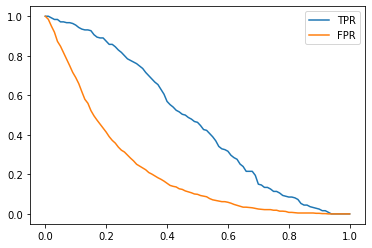

In [73]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()


**Compute F1**

In [74]:
def compute_f1_score(tp, fp, fn, tn):
  P = tp / (tp + fn)
  R = fp / (fp + tn)
  F1 = 2 * P * R / (P + R)
  return F1

In [75]:
f1_scores = []

f1_thresholds = np.linspace(0, 1, 101)

for ft in [0.1,0.3,0.5,0.7]:
    th, tp, fp, fn, tn = precision_recall(ft)
    f1 = compute_f1_score(tp, fp, fn, tn)
    f1_scores.append((th, f1))

In [76]:
f1_scores

[(0.1, 0.8012028577448332),
 (0.3, 0.37757295892613435),
 (0.5, 0.16345184488204853),
 (0.7, 0.04258839610085968)]

**KFold Method**

In [77]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[feature].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model


In [78]:
def predict(df, dv, model):
    dicts = df[feature].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [80]:
from sklearn.model_selection import KFold

In [84]:
n_splits = 5

for C in [0.01, 0.1, 1, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.default.values
        y_val = df_val.default.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))


C=0.01 0.808 +- 0.012
C=0.1 0.813 +- 0.014
C=1 0.812 +- 0.014
C=10 0.814 +- 0.015
